<h1 style="color:blue" align="center">Car Price Prediction</h1>

- **Importing Libraries**

In [44]:
import pickle
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

- **Reading CSV File**

In [45]:
df1 = pd.read_csv("honda_cars_data.csv")
df1.head()

,Year,kms Driven,Fuel Type,Suspension,Price,Car Model
0,2019,19006 kms,Petrol,Automatic,9.29 Lakh,Honda City V CVT
1,2021,11936 kms,Petrol,Automatic,13.95 Lakh,Honda City ZX CVT
2,2018,29635 kms,Petrol,Automatic,9.95 Lakh,Honda City i-VTEC CVT ZX
3,2020,16163 kms,Petrol,Automatic,13.26 Lakh,Honda City ZX CVT
4,2015,105114 kms,Petrol,Manual,5.68 Lakh,Honda City i VTEC V


<h1 style="color:blue" align="center">Data Cleaning</h1>

- **Creating Backup of Dataset**

In [46]:
backup = df1.copy()

- **Info of the Dataset**

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        999 non-null    int64 
 1   kms Driven  999 non-null    object
 2   Fuel Type   999 non-null    object
 3   Suspension  999 non-null    object
 4   Price       999 non-null    object
 5   Car Model   999 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


- **Shape of Dataset**

In [48]:
df1.shape

(999, 6)

- **Cleaning Year Column**

*As we see Year column has no Non-Year values and it's in (int) DataType also, so it is already clean*

In [49]:
df1["Year"].unique()

array([2019, 2021, 2018, 2020, 2015, 2016, 2014, 2017, 2022, 2013, 2012,
       2010, 2011, 2008, 2009, 2023, 2007, 2005, 2004, 2003, 2006, 2000])

- **Cleaning kms Driven Column**

*Firstly we will strip the white spaces from both the ends of the string*

In [50]:
df1["kms Driven"] = df1["kms Driven"].str.strip()

*Then we will split the string with space as delimiter and keep the first numeric part*

In [51]:
df1["kms Driven"] = df1["kms Driven"].str.split().str.get(0)

*And finally we will convert the kms Driven into (int) DataType*

In [52]:
df1["kms Driven"] = df1["kms Driven"].astype(int)

- **Cleaning Fuel Type Column**

*Here we can see extra white spaces in Fuel Type column*

In [53]:
df1["Fuel Type"].unique()

array([' Petrol ', ' Diesel ', ' CNG '], dtype=object)

*So we will strip the extra spaces from both the ends*

In [54]:
df1["Fuel Type"] = df1["Fuel Type"].str.strip()

- **Cleaning Suspension Column**

*Here we can see extra white spaces in Suspension column*

In [55]:
df1["Suspension"].unique()

array([' Automatic', ' Manual'], dtype=object)

*So we will strip the extra spaces from both the ends*

In [56]:
df1["Suspension"] = df1["Suspension"].str.strip()

- **Cleaning Price Column**

*Firstly we will strip the extra white spaces from the Price column*

In [57]:
df1["Price"] = df1["Price"].str.strip()

*Now we have created a function which will convert the Price from (6.35 Lakh to 635000) and store it back into the Price column*

In [58]:
def price_cleaner(values):
    output = values.split()
    result = [eval(i) for i in output]
    return np.prod(result)

df1["Price"] = df1["Price"].str.strip()
df1["Price"] = df1["Price"].str.replace(',','')
df1["Price"] = df1["Price"].str.replace('Lakh','100000')
df1["Price"] = df1["Price"].map(price_cleaner)

*And finally we will convert the Price into (int) DataType*

In [59]:
df1["Price"] = df1["Price"].astype(int)

- **Cleaning Car Model Column**

*Firstly we will strip the extra white spaces from the Car Model column*

In [60]:
df1["Car Model"] = df1["Car Model"].str.strip()

*Then we will split the string with space as delimiter and keep the first 3 words*

In [61]:
df1["Car Model"] = df1["Car Model"].str.split().str.slice(start=0, stop=3).str.join(" ")

- **Exporting Cleaned Dataset as CSV File**

In [62]:
df1.to_csv("clean_cars_data.csv")

<h1 style="color:blue" align="center">Data Visualization</h1>

- **Relationship of Year with Price**

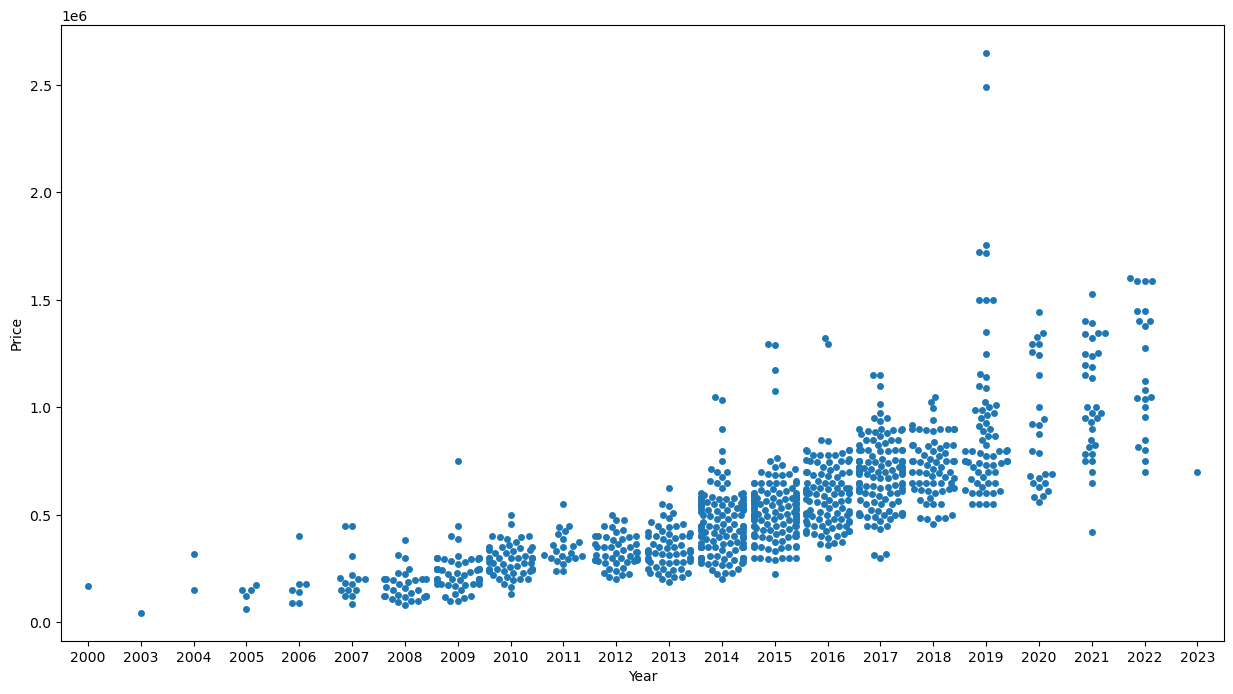

In [63]:
warnings.filterwarnings("ignore", category=UserWarning)
plt.figure(figsize=(15,8))
ax = sns.swarmplot(data=df1, x='Year', y='Price')
ax.set_xticklabels(ax.get_xticklabels())
plt.show()

- **Relationship of kms Driven with Price**

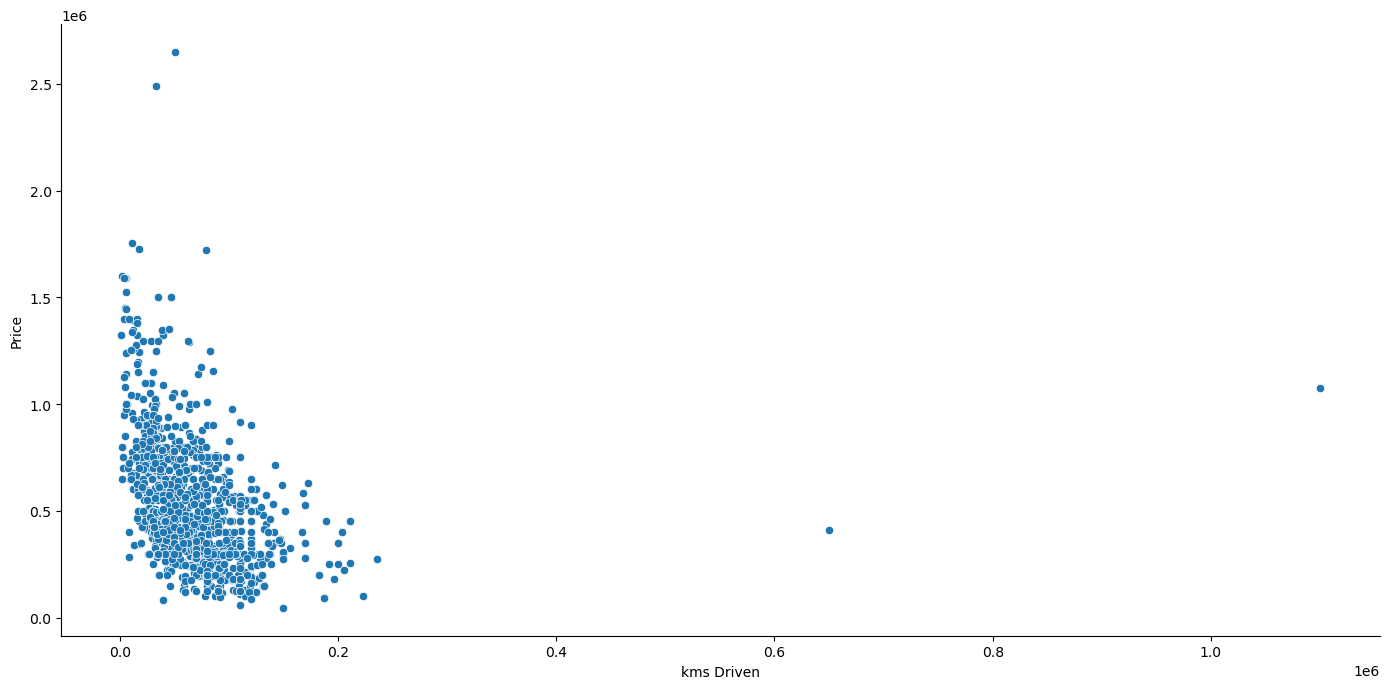

In [64]:
sns.relplot(data=df1, x='kms Driven', y='Price', height=7, aspect=2)
plt.show()

- **Relationship of Price with Car Model, Suspension as Hue**

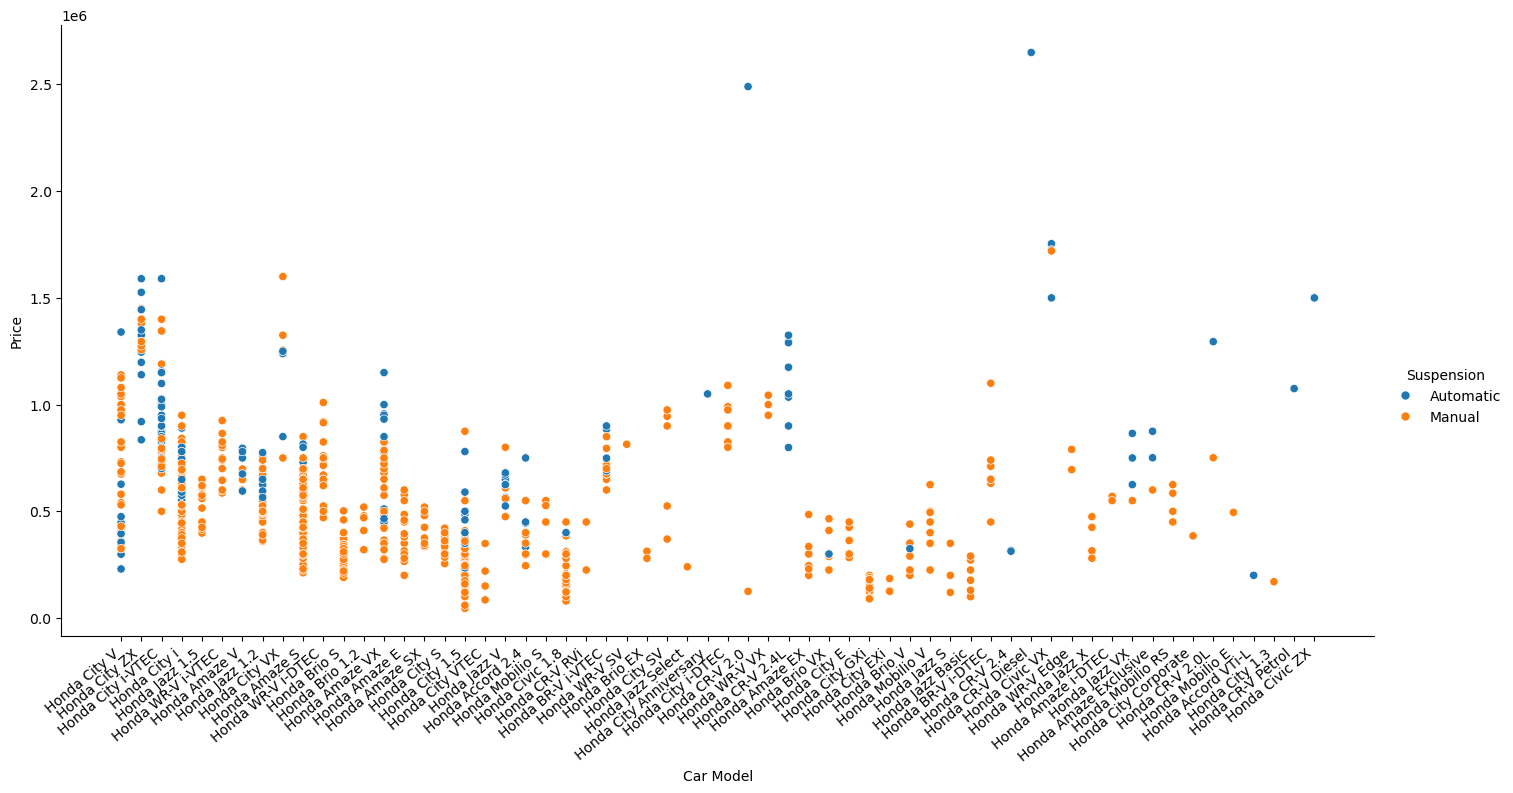

In [65]:
ax = sns.relplot(data=df1, x='Car Model', y='Price', hue='Suspension', height=7, aspect=2)
ax.set_xticklabels(rotation=40, ha='right')
plt.show()

<h1 style="color:blue" align="center">Dummy Variable</h1>

- **Creating Dummy Variable for Fuel Type Column**

In [66]:
dummies1 = pd.get_dummies(df1["Fuel Type"], dtype="int")

- **Converting dummies1 to DataFrame**

In [67]:
fuel_dummies = pd.DataFrame(dummies1)
fuel_dummies.head()

,CNG,Diesel,Petrol
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


- **Merging df1 and fuel_dummies and storing into a New DataFrame**

In [68]:
df2 = pd.concat([df1,fuel_dummies], axis="columns")

- **Creating Dummy Variable for Suspension Column**

In [69]:
dummies2 = pd.get_dummies(df2["Suspension"], dtype="int")

- **Converting dummies2 to DataFrame**

In [70]:
suspension_dummies = pd.DataFrame(dummies2)
suspension_dummies.head()

,Automatic,Manual
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


- **Merging df2 and suspension_dummies and storing into a New DataFrame**

In [71]:
df3 = pd.concat([df2,suspension_dummies], axis="columns")

- **Creating Dummy Variable for Car Model Column**

In [72]:
dummies3 = pd.get_dummies(df3["Car Model"], dtype="int")

- **Converting dummies3 to DataFrame**

In [73]:
car_dummies = pd.DataFrame(dummies3)
car_dummies.head()

,Honda Accord 2.4,Honda Accord VTi-L,Honda Amaze E,Honda Amaze EX,Honda Amaze Exclusive,Honda Amaze S,Honda Amaze SX,Honda Amaze V,Honda Amaze VX,Honda Amaze i-DTEC,...,Honda Jazz X,Honda Mobilio E,Honda Mobilio RS,Honda Mobilio S,Honda Mobilio V,Honda WR-V Edge,Honda WR-V SV,Honda WR-V VX,Honda WR-V i-DTEC,Honda WR-V i-VTEC
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- **Merging df3 and car_dummies and storing into a New DataFrame**

In [74]:
df4 = pd.concat([df3,car_dummies], axis="columns")

- **Dropping Fuel Type, Suspension, Car Model Columns after Converting it into Dummies**

In [75]:
df5 = df4.drop(["Fuel Type","Suspension","Car Model"], axis="columns")
df5.head()

,Year,kms Driven,Price,CNG,Diesel,Petrol,Automatic,Manual,Honda Accord 2.4,Honda Accord VTi-L,...,Honda Jazz X,Honda Mobilio E,Honda Mobilio RS,Honda Mobilio S,Honda Mobilio V,Honda WR-V Edge,Honda WR-V SV,Honda WR-V VX,Honda WR-V i-DTEC,Honda WR-V i-VTEC
0,2019,19006,928999,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021,11936,1395000,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2018,29635,994999,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020,16163,1326000,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015,105114,568000,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


<h1 style="color:blue" align="center">Outlier Removal</h1>

- **Describing the Dataset**

*Here we can see 75% of the cars has driven 85000 kms and the maximum value of kms Driven is 11 Lakh kms, which must be an Outlier*

*Also we can see 75% of the cars has priced at 7 Lakh and the maximum price is 26 Lakh, which also must be an Outlier*

In [76]:
df5.describe()

,Year,kms Driven,Price,CNG,Diesel,Petrol,Automatic,Manual,Honda Accord 2.4,Honda Accord VTi-L,...,Honda Jazz X,Honda Mobilio E,Honda Mobilio RS,Honda Mobilio S,Honda Mobilio V,Honda WR-V Edge,Honda WR-V SV,Honda WR-V VX,Honda WR-V i-DTEC,Honda WR-V i-VTEC
count,999.000000,9.990000e+02,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,2014.717718,6.607667e+04,5.530370e+05,0.001001,0.201201,0.797798,0.223223,0.776777,0.013013,0.001001,...,0.004004,0.001001,0.004004,0.005005,0.009009,0.002002,0.001001,0.003003,0.019019,0.018018
std,3.713756,5.310468e+04,3.030851e+05,0.031639,0.401099,0.401843,0.416615,0.416615,0.113387,0.031639,...,0.063182,0.031639,0.063182,0.070604,0.094535,0.044721,0.031639,0.054745,0.136660,0.133083
min,2000.000000,1.425000e+03,4.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,3.534100e+04,3.265000e+05,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,5.990000e+04,5.099990e+05,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2017.000000,8.528750e+04,7.000000e+05,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2023.000000,1.100000e+06,2.650000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


*So we will filter all the cars having kms Driven less than 1.5 Lakh kms for best possible data*

In [77]:
df5 = df5[df5["kms Driven"]<150000]

*Also we will filter all the cars with price less than 10 Lakh for best possible data*

In [78]:
df5 = df5[df5["Price"]<1000000]

<h1 style="color:blue" align="center">Model Building</h1>

- **Creating Dependent and Independent Variables**

In [79]:
X = df5.drop(["Price"], axis="columns")
y = df5.Price

- **Train Test Split**

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

- **Importing LinearRegression Model**

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
lr = LinearRegression()

- **Fitting the Model**

In [85]:
lr.fit(X_train, y_train)

LinearRegression()

- **Importing KFold for measuring Model Overall Performance**

In [87]:
from sklearn.model_selection import KFold

In [88]:
kf = KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

- **Importing CrossValScore for Best Overall Score**

In [89]:
from sklearn.model_selection import cross_val_score

In [90]:
cross_val = cross_val_score(LinearRegression(),X,y)

- **Mean of CrossValScore**

In [91]:
cross_val.mean()

np.float64(0.8335835128641651)

- **Predicting the Output**

In [92]:
y_predicted = lr.predict(X_test)

- **R2-Score of the Model**

In [98]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

In [99]:
r2_score(y_test, y_predicted)

0.8211897942748794

In [100]:
mean_absolute_error(y_test, y_predicted)

68008.3624664556

In [101]:
mean_absolute_percentage_error(y_test, y_predicted)

0.16238366808821547

- **Exporting the Model**

In [102]:
with open("model.pkl", "wb") as file:
    pickle.dump(lr, file)